In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime

In [2]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade scipy pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade scikit-learn scipy packaging


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 58.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 40.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
import os
from skillsnetwork import cvstudio

In [7]:
cvstudioClient = cvstudio.CVStudio()
#cvstudioClient.downloadAll()

In [8]:
annotations = cvstudioClient.get_annotations()

In [9]:
first_five = {k:annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'355d324e-3b0f-4c8f-92b8-75efc0d2b96a.jpg': [{'label': 'dog'}],
 '7472b139-cf70-400c-9a52-e2791688e80f.jpg': [{'label': 'cat'}],
 '8c8b7d01-4a10-4356-ba30-4fa9d18386f3.jpg': [{'label': 'cat'}],
 '5a2c73a0-2cdf-4d19-8929-ff120df21e42.jpg': [{'label': 'dog'}],
 '6a10f75d-dbf9-454c-beb8-bdb144369191.jpg': [{'label': 'dog'}]}

In [10]:
random_file = 'images/' + random.choice(list(annotations["annotations"].keys())) 

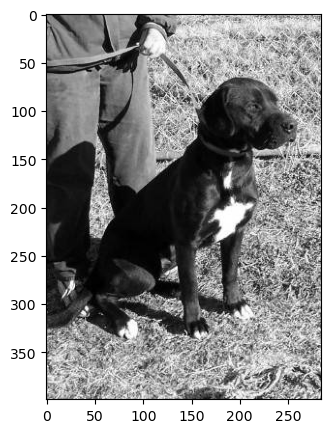

In [11]:
image_sample = cv2.imread(random_file, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image_sample, cmap='gray')
plt.show()

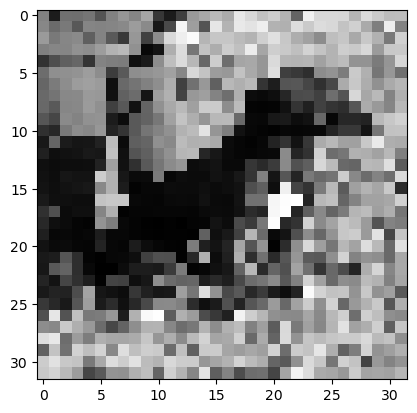

In [12]:
image_sample = cv2.resize(image_sample, (32,32))
plt.imshow(image_sample, cmap='gray')
plt.show()

Flatten image - makes the image a numpy array for the algorithm to handle and recognize.

In [13]:
pixels = image_sample.flatten()
pixels

array([130,  29, 113, ..., 166, 162, 182], dtype=uint8)

**Repeating the process for all images**

We will now repeat the same process above to load and process all the images you’ve annotated and label each picture. KNN is supervised machine learning algorithm, therefore we have to explicitly create labels for the machine.

Depending on how much data you have, this will take a while to run...


In [14]:
image_paths = list(paths.list_images('images'))
train_images = []
train_labels = []
class_object = annotations['labels']

#Loop over the input images.
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Label image using the annotations
      #Numeric label
    label = class_object.index(annotations["annotations"][image_path[7:]][0]['label'])
      #String label
    tmp_label = annotations["annotations"][image_path[7:]][0]['label']
    #resizing image
    image = cv2.resize(image, (32,32))
    pixels = image.flatten()
    #Append flattened image to
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded..', '\U0001F939', 'Image', str(i+1), 'is a ', tmp_label)

Loaded.. 🤹 Image 1 is a  dog
Loaded.. 🤹 Image 2 is a  cat
Loaded.. 🤹 Image 3 is a  dog
Loaded.. 🤹 Image 4 is a  cat
Loaded.. 🤹 Image 5 is a  cat
Loaded.. 🤹 Image 6 is a  cat
Loaded.. 🤹 Image 7 is a  dog
Loaded.. 🤹 Image 8 is a  dog
Loaded.. 🤹 Image 9 is a  dog
Loaded.. 🤹 Image 10 is a  cat
Loaded.. 🤹 Image 11 is a  cat
Loaded.. 🤹 Image 12 is a  cat
Loaded.. 🤹 Image 13 is a  cat
Loaded.. 🤹 Image 14 is a  dog
Loaded.. 🤹 Image 15 is a  cat
Loaded.. 🤹 Image 16 is a  cat
Loaded.. 🤹 Image 17 is a  dog
Loaded.. 🤹 Image 18 is a  dog
Loaded.. 🤹 Image 19 is a  dog
Loaded.. 🤹 Image 20 is a  dog
Loaded.. 🤹 Image 21 is a  dog
Loaded.. 🤹 Image 22 is a  dog
Loaded.. 🤹 Image 23 is a  cat
Loaded.. 🤹 Image 24 is a  cat
Loaded.. 🤹 Image 25 is a  dog
Loaded.. 🤹 Image 26 is a  dog
Loaded.. 🤹 Image 27 is a  dog
Loaded.. 🤹 Image 28 is a  cat
Loaded.. 🤹 Image 29 is a  dog
Loaded.. 🤹 Image 30 is a  cat
Loaded.. 🤹 Image 31 is a  dog
Loaded.. 🤹 Image 32 is a  cat
Loaded.. 🤹 Image 33 is a  cat
Loaded.. 🤹 Image 34

Create an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. We can do that by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. When you print the <code>train_labels</code>, the array will look like this <code>[[1], [0], ..., [0]]</code></p>


In [15]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [16]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
print(train_labels)

[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]

Split data into training and test set with a test size of your choice:

In [17]:
# Check lengths
print(len(train_images))  # Should match train_labels
print(len(train_labels))

# If the lengths don't match, find out why and correct it


200
200


In [18]:
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=0.3, random_state=0)

To train the KNN model, we will use the 'cv2.ml.KNearest_create()' from the OpenCV library. We need to define how many nearest neighbors will be used for classification as a hyper-parameter k. This parameter k can be toggled with/tuned in the training or model validation process. Fit the training and test images and get the accuracy score of the model.

We will try multiple values of k to find the optimal value for the data set we have. k refers to the number of nearest neighbours to include in the majority of the voting process.

In [19]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

#Get different values of k
k_values = [1, 4, 3, 5, 8]
k_result = []

for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(test_samples, k=k)
    k_result.append(result)
    
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)
    
end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))


Training Duration: 0:00:00.162134


We will get the accuracy value for each value of k. i.e., How many percent of the images were classified correctly? We will create a confusion matrix for a more comprehensive classification model evaluation.

In [20]:
#Create an empty list to save accuracy and the confusion matrix
accuracy_result=[]
confusion_matrices = []
#We will use loop caz. we have multiple value of k
for k_res in k_result:
    label_names = [0,1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    confusion_matrices.append(cmx)
    # Values for correct predictions.
    matches = k_res == test_labels
    correct = np.count_nonzero(matches)
    #Calculate accuracy
    accuracy = (correct*100.0)/len(test_labels)
    accuracy_result.append(accuracy)
#Accuracy for graph
rec_accuracy = {k_values[i]: accuracy_result[i] for i in range(len(k_values))}
list_res = sorted(rec_accuracy.items())
print(list_res)

[(1, 58.333333333333336), (3, 56.666666666666664), (4, 60.0), (5, 56.666666666666664), (8, 68.33333333333333)]


A confusion matrix is a performance measurement for classification problem. It is a table with a combination of predicted and actual values. On the y-axis, we have the `True` label and on the x-axis we have the `Predicted` label. This example will focus on a binary classifier, i.e. a yes or no model.

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Predicted: NO</td>
    <td>Predicted: YES</td>
  </tr>
  <tr>
    <td>True: NO</td>
    <td>30</td>
    <td>30</td>
  </tr>
  <tr>
    <td>True: YES</td>
    <td>10</td>
    <td>50</td>
  </tr>
</table>

In this matrix, we can see that there are two classes. For example, if we were predicting if an image is a hotdog, "yes" will be a hotdog and "no" will be not a hotdog. We have 120 predictions and out of those times, the classifier predicted "yes" 80 times and "no" 40 times but really, there were 60 "yes"s and 60 "no"s.

When we talk about confusion matrix, we talk about a few terms:
* True Positive (TP): Our model predicted "yes", and it was actually "yes"
* True Negative (TN): Our model predicted "no", and it was actually "no"
* False Positive (FP): Our model predicted "yes", but it was actually "no"
* False Negative (FN): Our model predicted "no", but it was actually "yes"

Let's look at it in the context of our example:

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Predicted: NO</td>
    <td>Predicted: YES</td>
  </tr>
  <tr>
    <td>True: NO</td>
    <td>TN = 30</td>
    <td>FP = 30</td>
    <td>60</td>
  </tr>
  <tr>
    <td>True: YES</td>
    <td>FN = 10</td>
    <td>TP = 50</td>
    <td>60</td>
  </tr>
  <tr>
    <td>&nbsp;</td>
    <td>40</td>
    <td>80</td>
  </tr>
</table>

**Accuracy** is the number the model got right over the total number of predictions. This is (TP+TN)/Total Number of Oredictions.


Visualize the confusion mstrix:

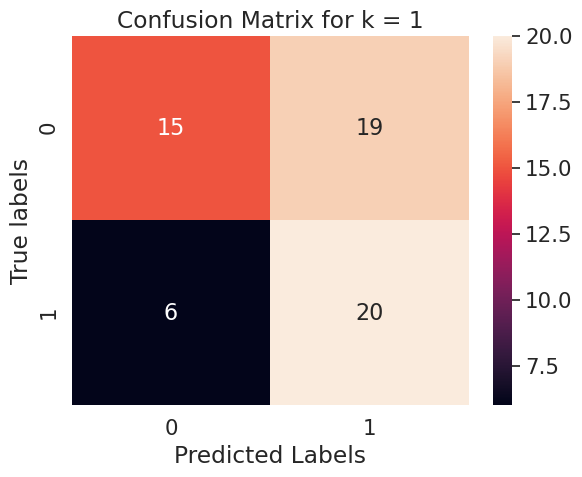

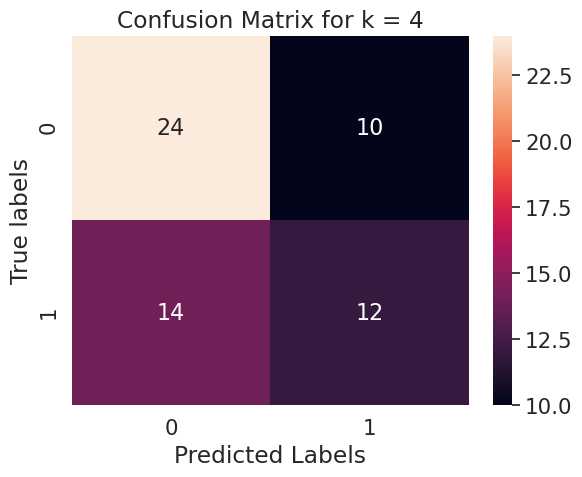

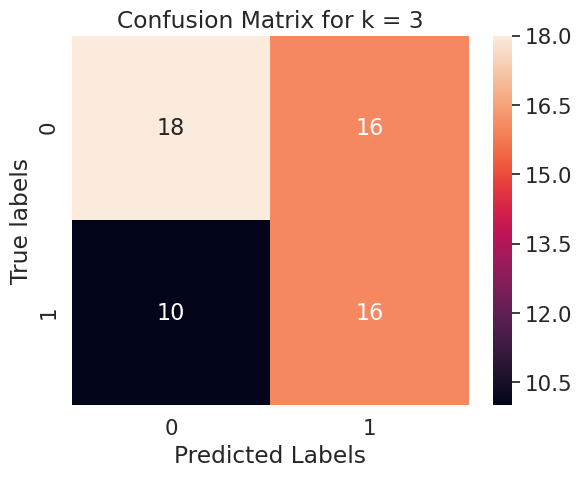

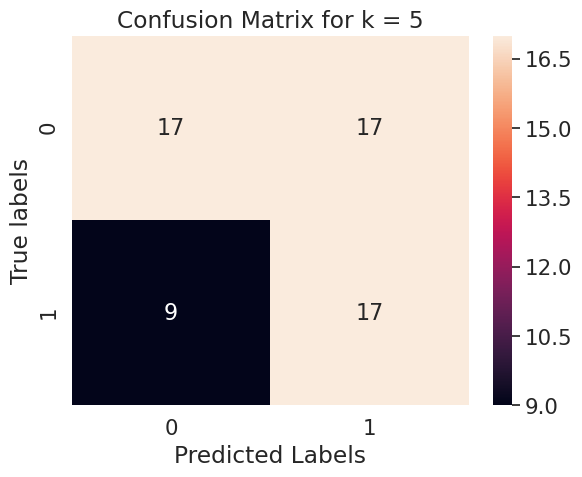

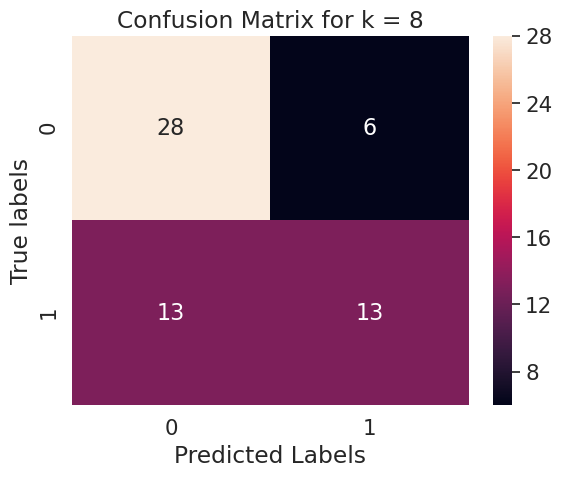

In [23]:
#Creating confusion matrix heatmap for each value of k
for i, array in enumerate(confusion_matrices):
    # Convert confusion matrix to a DataFrame for Visualization
    dataframe_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4)
    sns.heatmap(dataframe_cm, annot=True, annot_kws={"size":16}, fmt=".0f")
    
    #Using the k value from k_values
    title = f"Confusion Matrix for k = {k_values[i]}"
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True labels")
    plt.show()

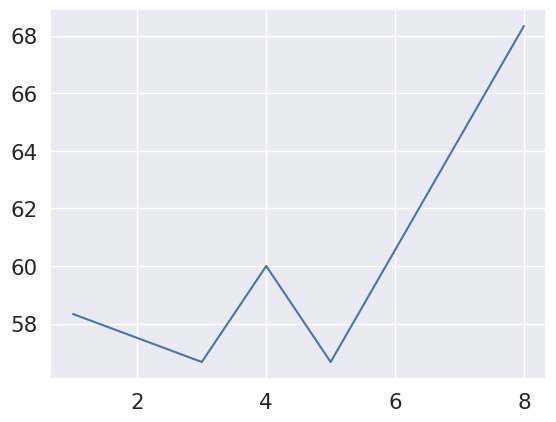

In [24]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [25]:
k_best = max(list_res, key=lambda item:item[1])[0]
k_best

8

**Reporting Result to CV Studio**

In [26]:
parameters = {
    'k_best': k_best
}

result = cvstudioClient.report(started=start_datetime, completed=end_datetime, parameters = parameters, accuracy=list_res)
if result.ok:
    print('Congratulations, your result has been reported back to CV Studio')

Congratulations, your result has been reported back to CV Studio


Saving the KNN model to a file:

In [27]:
knn.save('knn_sample.yml')

In [28]:
result = cvstudioClient.uploadModel('knn_sample.yml', {'k_best': k_best})

File Uploaded
